# Import libraries

In [1]:
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score

# Read Data

In [2]:
# Reading Datasets
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
submission_id = test.PassengerId

In [3]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Explore the data

In [5]:
# Seperating values
test[['PassengerGGG', 'PassengerPP']] = test['PassengerId'].str.split('_', expand = True)
test['PassengerGGG'] = test['PassengerGGG'].astype(int)
test['PassengerPP'] = test['PassengerPP'].astype(int)

train[['PassengerGGG', 'PassengerPP']] = train['PassengerId'].str.split('_', expand = True)
train['PassengerGGG'] = train['PassengerGGG'].astype(int)
train['PassengerPP'] = train['PassengerPP'].astype(int)

In [6]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
PassengerGGG      0
PassengerPP       0
dtype: int64

In [7]:
# Splitting cabin column into deck, cabin_num, Side
test[['Deck', 'cabin_num', 'Side']] = test['Cabin'].str.split('/', expand = True)
test['cabin_num'] = test['cabin_num']

train[['Deck', 'cabin_num', 'Side']] = train['Cabin'].str.split('/', expand = True)
train['cabin_num'] = train['cabin_num']


In [8]:
train = train.drop(columns = ['PassengerId','Name'])

# Encode the data

In [9]:
# Encode categorical values to numerical values
enc = OrdinalEncoder()
test[['CryoSleep','VIP']]=enc.fit_transform(test[['CryoSleep','VIP']])
enc.fit(test[['CryoSleep','VIP']])

OrdinalEncoder()

In [10]:
# Encode categorical values to numerical values
train[['CryoSleep','VIP','Transported']]=enc.fit_transform(train[['CryoSleep','VIP','Transported']])
enc.fit(train[['CryoSleep','VIP','Transported']])

OrdinalEncoder()

In [11]:
# Function to convert dtypes to integers
def convert_columns_to_int(df):
    for column in df.columns:
        try:
            df[column] = df[column].astype(int)
        except ValueError:
            print(f"Unable to convert column '{column}' to int. Skipping...")
    return df


In [12]:
# Filling missing values with mean or mode based on the data using function below
def fill_null_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            mode_value = df[column].mode().values[0]
            df[column] = df[column].fillna(mode_value)
        else:
            mean_value = df[column].mean()
            df[column] = df[column].fillna(mean_value)
    return df

In [13]:
# Checking for Null values
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
PassengerGGG      0
PassengerPP       0
Deck            100
cabin_num       100
Side            100
dtype: int64

In [14]:
# Filling missing values in columns planet,CryoSleep,vip
test = fill_null_values(test)

In [15]:
# Filling missing values in columns of test data
test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
PassengerGGG    0
PassengerPP     0
Deck            0
cabin_num       0
Side            0
dtype: int64

In [16]:
# Checking Null values in train data
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
PassengerGGG      0
PassengerPP       0
Deck            199
cabin_num       199
Side            199
dtype: int64

In [17]:
# Filling missing values in columns of train
train = fill_null_values(train)
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
PassengerGGG    0
PassengerPP     0
Deck            0
cabin_num       0
Side            0
dtype: int64

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   float64
 3   Cabin         4277 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4277 non-null   float64
 6   VIP           4277 non-null   float64
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4277 non-null   object 
 13  PassengerGGG  4277 non-null   int64  
 14  PassengerPP   4277 non-null   int64  
 15  Deck          4277 non-null   object 
 16  cabin_num     4277 non-null   object 
 17  Side          4277 non-null   object 
dtypes: float64(8), int64(2), obj

In [19]:
# Get dummies for categorical values
test = pd.get_dummies(test,columns=['Destination','HomePlanet'])
train = pd.get_dummies(train,columns=['Destination','HomePlanet'])

In [20]:
# Get dummies for categorical values
test = pd.get_dummies(test,columns=['Deck','Side'])
train = pd.get_dummies(train,columns=['Deck','Side'])

In [21]:
# Drop Unnecessary columns
test.drop(columns = ['Cabin','Name','PassengerId'],inplace = True)

In [22]:
# Converting datatypes into integers
test = convert_columns_to_int(test)

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   CryoSleep                  4277 non-null   int64
 1   Age                        4277 non-null   int64
 2   VIP                        4277 non-null   int64
 3   RoomService                4277 non-null   int64
 4   FoodCourt                  4277 non-null   int64
 5   ShoppingMall               4277 non-null   int64
 6   Spa                        4277 non-null   int64
 7   VRDeck                     4277 non-null   int64
 8   PassengerGGG               4277 non-null   int64
 9   PassengerPP                4277 non-null   int64
 10  cabin_num                  4277 non-null   int64
 11  Destination_55 Cancri e    4277 non-null   int64
 12  Destination_PSO J318.5-22  4277 non-null   int64
 13  Destination_TRAPPIST-1e    4277 non-null   int64
 14  HomePlanet_Earth        

In [24]:
# drop dummy columns
train=train.drop(columns = ['Cabin'])

In [25]:
# Converting datatypes into integers
train = convert_columns_to_int(train)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   CryoSleep                  8693 non-null   int64
 1   Age                        8693 non-null   int64
 2   VIP                        8693 non-null   int64
 3   RoomService                8693 non-null   int64
 4   FoodCourt                  8693 non-null   int64
 5   ShoppingMall               8693 non-null   int64
 6   Spa                        8693 non-null   int64
 7   VRDeck                     8693 non-null   int64
 8   Transported                8693 non-null   int64
 9   PassengerGGG               8693 non-null   int64
 10  PassengerPP                8693 non-null   int64
 11  cabin_num                  8693 non-null   int64
 12  Destination_55 Cancri e    8693 non-null   int64
 13  Destination_PSO J318.5-22  8693 non-null   int64
 14  Destination_TRAPPIST-1e 

In [27]:
x=train['Transported'].value_counts()
x

1    4378
0    4315
Name: Transported, dtype: int64

# Visualizing data for relations

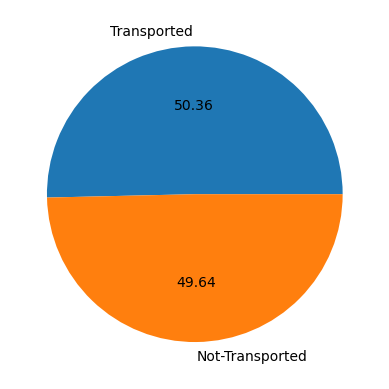

In [28]:
# plotting percentage of people tranported
plt.pie(x, labels = ['Transported','Not-Transported'],autopct='%0.2f')
plt.show()

In [29]:
train.dtypes

CryoSleep                    int64
Age                          int64
VIP                          int64
RoomService                  int64
FoodCourt                    int64
ShoppingMall                 int64
Spa                          int64
VRDeck                       int64
Transported                  int64
PassengerGGG                 int64
PassengerPP                  int64
cabin_num                    int64
Destination_55 Cancri e      int64
Destination_PSO J318.5-22    int64
Destination_TRAPPIST-1e      int64
HomePlanet_Earth             int64
HomePlanet_Europa            int64
HomePlanet_Mars              int64
Deck_A                       int64
Deck_B                       int64
Deck_C                       int64
Deck_D                       int64
Deck_E                       int64
Deck_F                       int64
Deck_G                       int64
Deck_T                       int64
Side_P                       int64
Side_S                       int64
dtype: object

<AxesSubplot:>

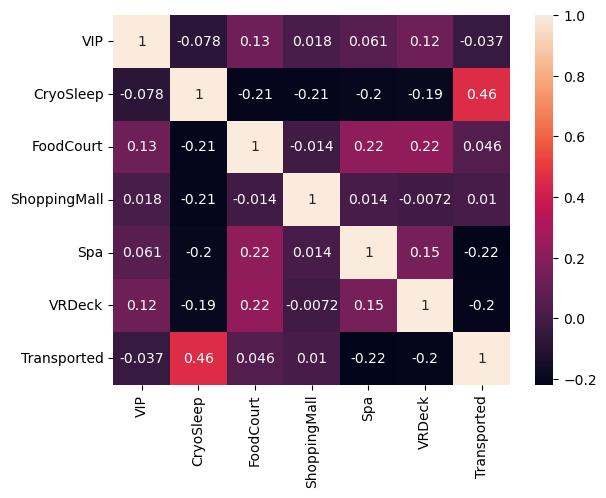

In [30]:
# plotting to check correlation before encoding
df1 = train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Transported']]
sns.heatmap(df1.corr(),annot = True)

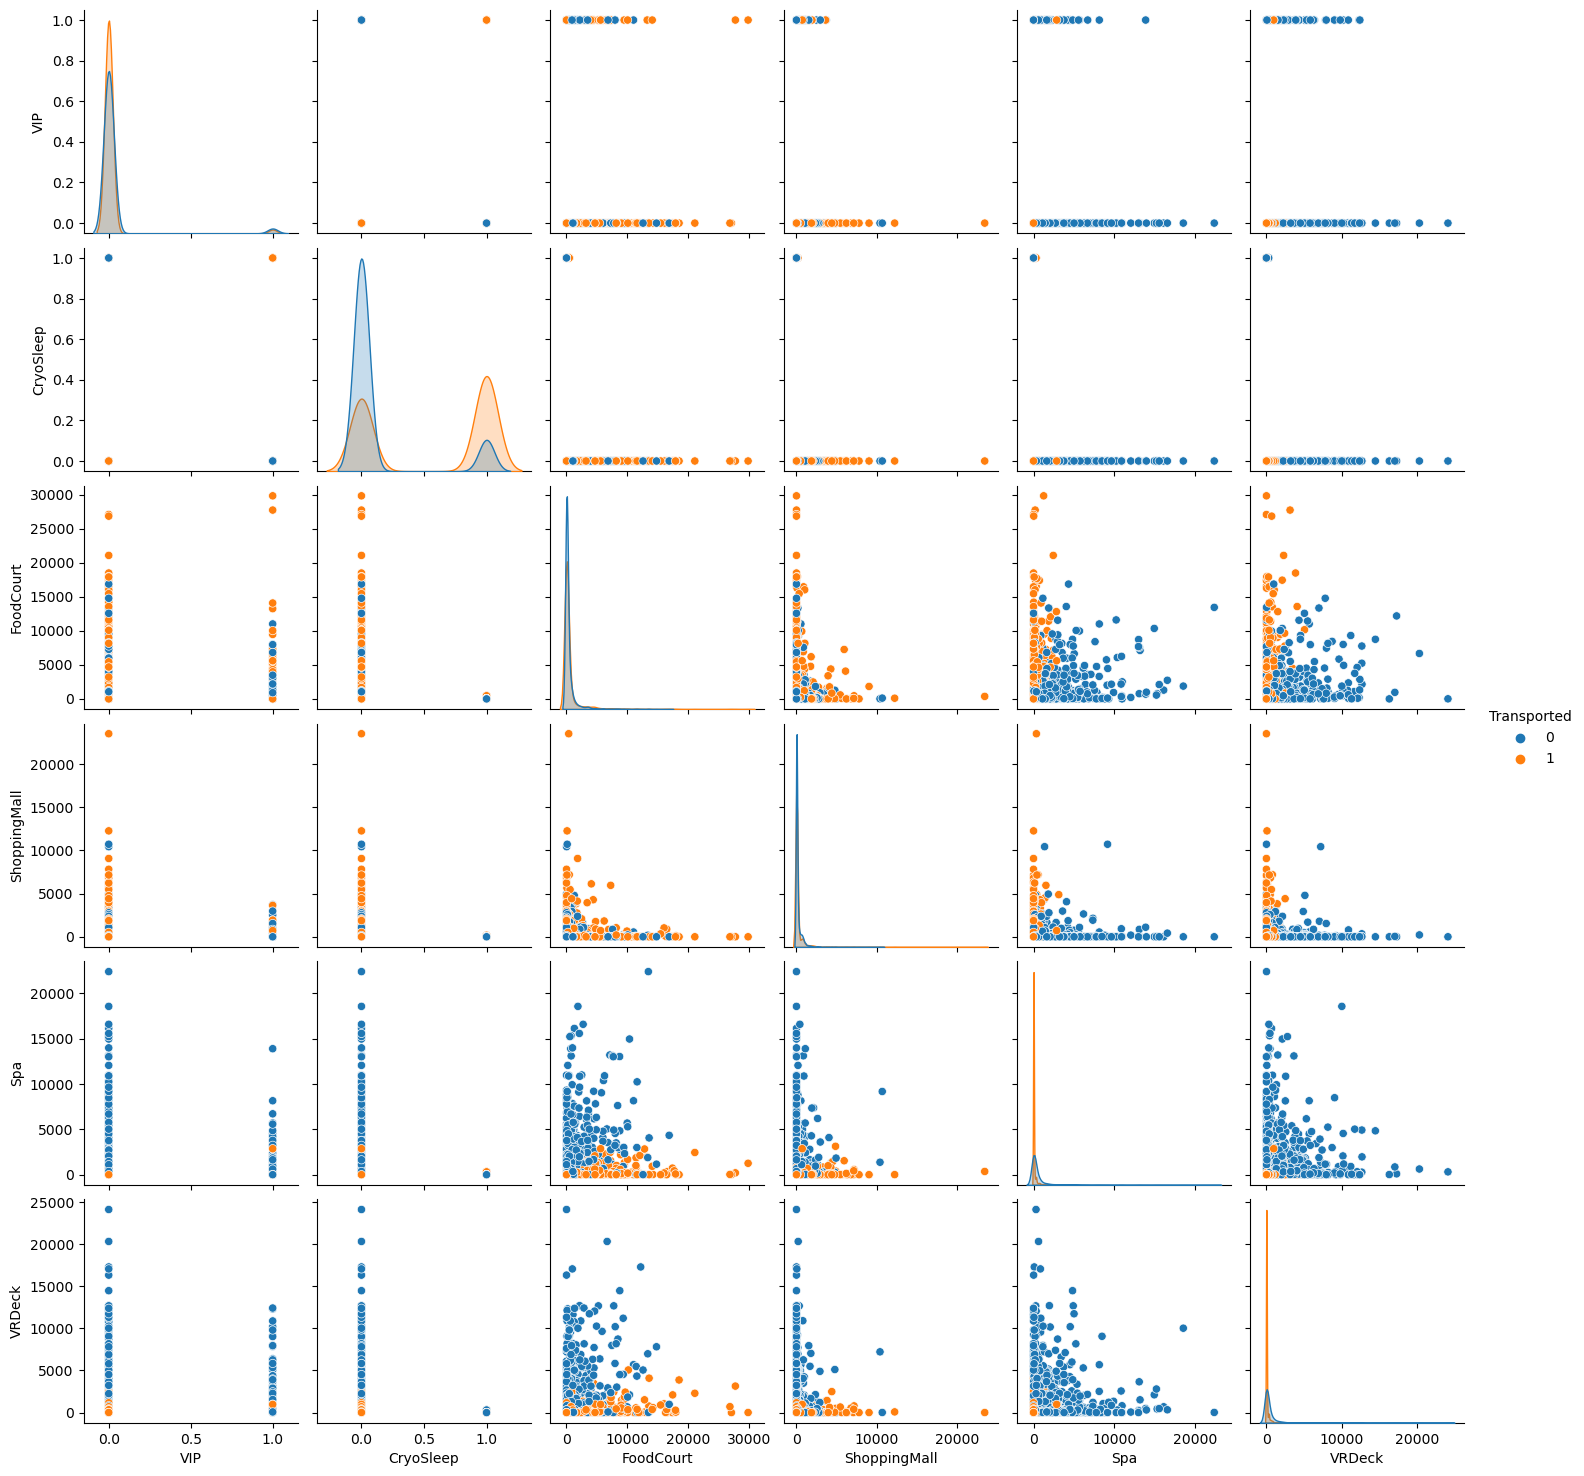

In [31]:
# plotting to check patterns if teleportation is dependent on any factor
sns.pairplot(df1,hue = 'Transported')

In [32]:
train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGGG,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0,39,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,0,24,0,109,9,25,549,44,1,2,...,0,0,0,0,0,1,0,0,0,1
2,0,58,1,43,3576,0,6715,49,0,3,...,1,0,0,0,0,0,0,0,0,1
3,0,33,0,0,1283,371,3329,193,0,3,...,1,0,0,0,0,0,0,0,0,1
4,0,16,0,303,70,151,565,2,1,4,...,0,0,0,0,0,1,0,0,0,1


# Model selection and Scores

In [33]:
# import scikitlearn libraries to select models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [34]:
# train data
y = train["Transported"]
X = train.drop(["Transported"], axis = 1)

In [35]:
# check for missing values after encoding
X.isnull().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
PassengerGGG                 0
PassengerPP                  0
cabin_num                    0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_P                       0
Side_S                       0
dtype: int64

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   CryoSleep                  8693 non-null   int64
 1   Age                        8693 non-null   int64
 2   VIP                        8693 non-null   int64
 3   RoomService                8693 non-null   int64
 4   FoodCourt                  8693 non-null   int64
 5   ShoppingMall               8693 non-null   int64
 6   Spa                        8693 non-null   int64
 7   VRDeck                     8693 non-null   int64
 8   PassengerGGG               8693 non-null   int64
 9   PassengerPP                8693 non-null   int64
 10  cabin_num                  8693 non-null   int64
 11  Destination_55 Cancri e    8693 non-null   int64
 12  Destination_PSO J318.5-22  8693 non-null   int64
 13  Destination_TRAPPIST-1e    8693 non-null   int64
 14  HomePlanet_Earth        

## Split data into Train and Test

In [37]:
# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state = 2)

In [38]:
# Import all the models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier


In [39]:
# Initializing models

svc = SVC(kernel = 'linear', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear')
rfc = RandomForestClassifier(n_estimators = 80,random_state = 2)
abc = AdaBoostClassifier(n_estimators = 80,random_state = 2)
bc = BaggingClassifier(n_estimators = 80,random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 80,random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 90,random_state = 2)
xgb = XGBClassifier(n_estimators = 80,random_state = 2)

In [40]:
# Dictionary of Models to print results

clfs = {
    #'SVC':svc,
    #'KNC':knc,
    #'MNB':mnb,
    'DTC':dtc,
    'LRC':lrc,
    'RFC':rfc,
    'ABC':abc,
    'BC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'XGB':xgb
}

In [41]:
# Function to fit Models
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
    return accuracy,precision,balanced_accuracy


In [42]:
# Scores

accuracy_scores = []
precision_scores = []
balanced_scores =[]

for name,clf in clfs.items():
    current_accuracy,current_precision,current_balanced_accuracy = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print('For ',name)
    print('Accuracy - ',current_accuracy)
    print("Precision - ",current_precision)
    print("Balanced Score - ",current_balanced_accuracy)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    balanced_scores.append(current_balanced_accuracy)

For  DTC
Accuracy -  0.7688326624496837
Precision -  0.7354301572617946
Balanced Score -  0.7636283852219519
For  LRC
Accuracy -  0.7981598619896493
Precision -  0.8017241379310345
Balanced Score -  0.7972313696792293
For  RFC
Accuracy -  0.81196089706728
Precision -  0.8435294117647059
Balanced Score -  0.8132095907772421
For  ABC
Accuracy -  0.7941345600920069
Precision -  0.793836344314559
Balanced Score -  0.7928392645974853
For  BC
Accuracy -  0.8027602070155262
Precision -  0.832552693208431
Balanced Score -  0.8038778589117443
For  ETC
Accuracy -  0.7918343875790684
Precision -  0.8343483556638246
Balanced Score -  0.7938348791209957
For  GBDT
Accuracy -  0.8131109833237493
Precision -  0.8077731092436975
Balanced Score -  0.8115564199239568
For  XGB
Accuracy -  0.8113858539390454
Precision -  0.8286358511837655
Balanced Score -  0.8116154143930596


In [43]:
# Move the data to dataframe
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Balanced Score':balanced_scores})
performance_df

,Algorithm,Accuracy,Precision,Balanced Score
0,DTC,0.768833,0.735430,0.763628
1,LRC,0.798160,0.801724,0.797231
2,RFC,0.811961,0.843529,0.813210
3,ABC,0.794135,0.793836,0.792839
4,BC,0.802760,0.832553,0.803878
5,ETC,0.791834,0.834348,0.793835
6,GBDT,0.813111,0.807773,0.811556
7,XGB,0.811386,0.828636,0.811615


# Best model

In [44]:
# Best model with precision, balance and accuracy
gbdt = GradientBoostingClassifier(n_estimators = 105,random_state = 2)
gbdt.fit(X_train, y_train)
prediction = gbdt.predict(X_test)
accuracy_score(y_test, prediction)

0.8177113283496262

# Save Data

In [45]:
submit_pred = gbdt.predict(test)
submit_pred = submit_pred.astype(bool)
output = pd.DataFrame({"PassengerId": submission_id,
                       "Transported": submit_pred})
output

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [46]:
submission = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
submission['Transported'] = submit_pred
submission.to_csv('submission.csv', index=False)
submission.tail()

,PassengerId,Transported
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
4276,9277_01,True


### I thank 'Gusthema' for reference
### I thank 'Kaggle' for reference and datasets

# Author : Samanth Kumar